<a href="https://colab.research.google.com/github/DEBANGANROY/DEBANGANROY/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis and detection of cybercrimes in Banking organizations

dataset_link: https://drive.google.com/file/d/1xSNgEPRadp77x7uxtLX26U1sWzPRA5ru/view?usp=sharing

kaggle_link: https://www.kaggle.com/sampadab17/network-intrusion-detection

### IMPORTING THE DATASET , FILTERING OF DATA

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ML/NIVT/Colab files/project/Train_data.csv')
train.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal


In [ ]:
train.shape

(25192, 42)

In [ ]:
train.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

There is no NaN data so no need of filtering the dataset for NaN values

In [ ]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


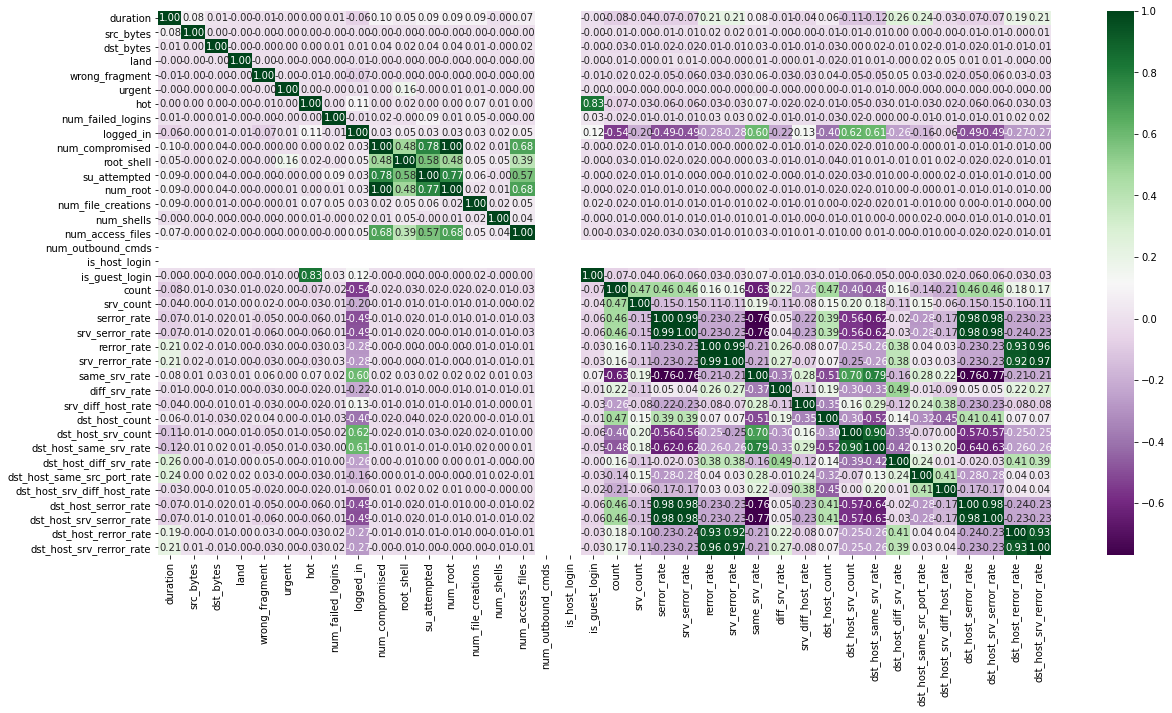

In [ ]:
cor = train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor, fmt="0.2f", cmap="PRGn", annot=True)

NO CORRELATION DATA FOR 'num_outbound_cmd' AND 'is_host_login'.

In [ ]:
traindf = train.drop(['num_outbound_cmds'], axis=1)
traindf = traindf.drop(['is_host_login'], axis=1)

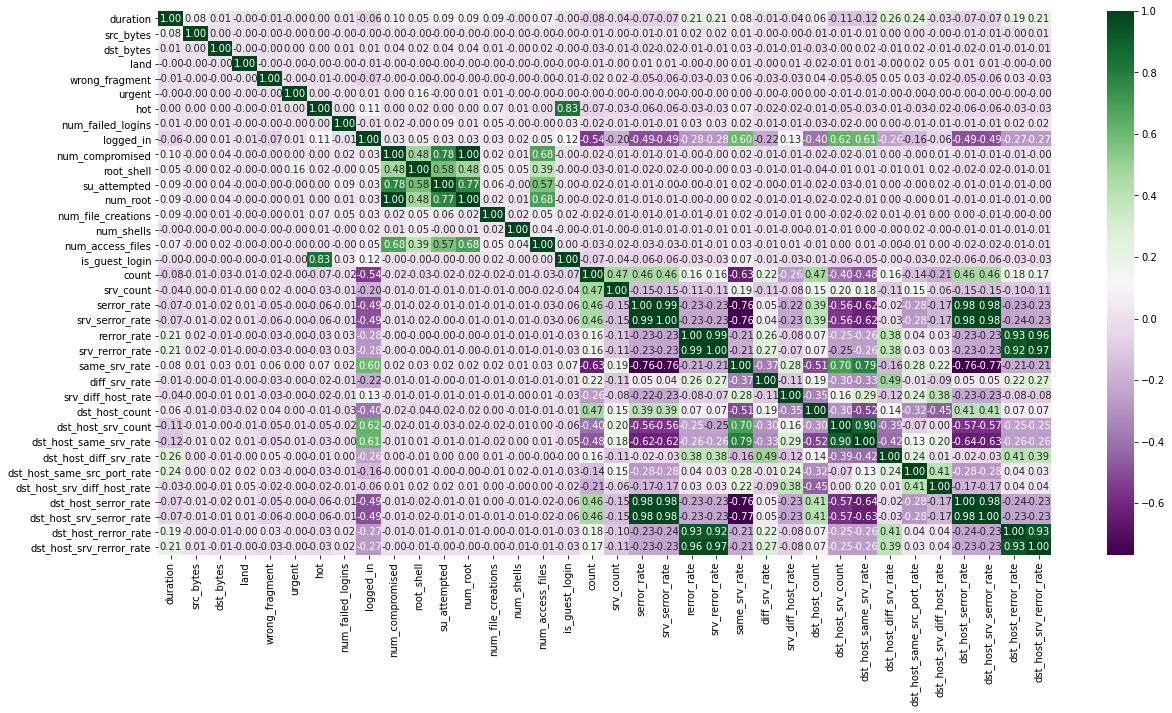

In [ ]:
cor = traindf.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor, fmt="0.2f", cmap="PRGn", annot=True)

In [ ]:
traindf.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
cat_col=traindf.dtypes[traindf.dtypes=='object'].index.tolist()
class_fet=traindf['class'].tolist()
print(cat_col)
for i in cat_col:
    traindf[i]=traindf[i].replace(traindf[i].unique(),[i for i in range(len(traindf[i].unique()))])
traindf.head()

['protocol_type', 'service', 'flag', 'class']


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,0,0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,1,1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,0,3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,0,3,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


### TRAIN AND TEST DIVISION

In [ ]:
x = traindf.drop(['class'], axis=1)
y = traindf['class']

In [ ]:
print(x.shape)
x.head(2)

(25192, 39)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0
1,0,1,1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0


TEST AND TRAIN

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70, random_state=2)

### LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
lrpred=lr.predict(x_test)  

In [ ]:
acc_sc= accuracy_score(y_test,lrpred)
p_sc= precision_score(y_test,lrpred,average="micro")
rcall_sc = recall_score(y_test,lrpred,average="micro")
f1_sc = f1_score(y_test,lrpred,average="micro")

print("ACCURACY SCORE: {}%".format(acc_sc*100)+"\n"
      "PRECISION SCORE: {}%".format(p_sc*100)+"\n"
      "RECALL SCORE: {}%".format(rcall_sc*100)+"\n"
      "F1 SCORE: {}%".format(f1_sc*100))

ACCURACY SCORE: 86.90129663932257%
PRECISION SCORE: 86.90129663932257%
RECALL SCORE: 86.90129663932257%
F1 SCORE: 86.90129663932257%


In [ ]:
cls_rep=classification_report(y_test,lrpred)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4060
           1       0.85      0.86      0.86      3498

    accuracy                           0.87      7558
   macro avg       0.87      0.87      0.87      7558
weighted avg       0.87      0.87      0.87      7558



In [ ]:
conf_mat = pd.crosstab(y_test, lrpred, rownames=['True'], colnames=['Predicted'], margins=True).iloc[:2,:2]
print(conf_mat)

Predicted     0     1
True                 
0          3545   515
1           475  3023


### MULTIPLE CLASSIFIER HYBRID

*Classifiers used-*
1.   Naive Bayes
2.   Decision Tree
3.   Random Forest
4.   KNeighbors
5.   XGBOOST
6.   LogisticRegression



In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
models = []

models.append(('Naive Baye Classifier', gnb))
models.append(('Decision Tree Classifier', dtc))
models.append(('Random Forest Classifier', rfc))
models.append(('KNeighbors Classifier', knc))
models.append(('XGBoost Classifier', xgb))
models.append(('Logistic Regressor', lr))

In [ ]:
models

[('Naive Baye Classifier', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('Decision Tree Classifier',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best')),
 ('Random Forest Classifier',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estima

In [ ]:
for i, v in models:
  acc = round(accuracy_score(y_train, v.predict(x_train)),3)
  p_sc= round(precision_score(y_train, v.predict(x_train),average="micro"),3)
  rcall_sc = round(recall_score(y_train, v.predict(x_train),average="micro"),3)
  f1_sc = round(f1_score(y_train, v.predict(x_train),average="micro"),3)
  conf_mat = pd.crosstab(y_train, v.predict(x_train), rownames=['True'], colnames=['Predicted'], margins=True).iloc[:2,:2]
  cls_rep = classification_report(y_train, v.predict(x_train))

  print("======================={}=======================".format(i))
  print("Accuracy: {}%".format(acc*100))
  print()
  print("Precision: {}%".format(p_sc*100))
  print()
  print("Recall: {}%".format(rcall_sc*100))
  print()
  print("F1: {}%".format(f1_sc*100))
  print()
  print("Confusion Matrix: \n", conf_mat)
  print()
  print("Classification_report:\n ", cls_rep)
  print("---------------------------------------------------------------------------\n\n")

=======================Naive Baye Classifier=======================
Accuracy: 55.400000000000006%

Precision: 55.400000000000006%

Recall: 55.400000000000006%

F1: 55.400000000000006%

Confusion Matrix: 
 Predicted     0    1
True                
0          9204  185
1          7672  573

Classification_report:
                precision    recall  f1-score   support

           0       0.55      0.98      0.70      9389
           1       0.76      0.07      0.13      8245

    accuracy                           0.55     17634
   macro avg       0.65      0.52      0.41     17634
weighted avg       0.64      0.55      0.43     17634

---------------------------------------------------------------------------


=======================Decision Tree Classifier=======================
Accuracy: 100.0%

Precision: 100.0%

Recall: 100.0%

F1: 100.0%

Confusion Matrix: 
 Predicted     0     1
True                 
0          9389     0
1             0  8245

Classification_report:
            

## VALIDATION

In [ ]:
for i, v in models:
  acc = round(accuracy_score(y_test, v.predict(x_test)),3)
  p_sc= round(precision_score(y_test, v.predict(x_test),average="micro"),3)
  rcall_sc = round(recall_score(y_test, v.predict(x_test),average="micro"),3)
  f1_sc = round(f1_score(y_test, v.predict(x_test),average="micro"),3)
  conf_mat = pd.crosstab(y_test, v.predict(x_test), rownames=['True'], colnames=['Predicted'], margins=True).iloc[:2,:2]  
  cls_rep = classification_report(y_test, v.predict(x_test))

  print("======================={}=======================".format(i))
  print("Accuracy: {}%".format(acc*100))
  print()
  print("Precision: {}%".format(p_sc*100))
  print()
  print("Recall: {}%".format(rcall_sc*100))
  print()
  print("F1: {}%".format(f1_sc*100))
  print()
  print("Confusion Matrix: \n", conf_mat)
  print()
  print("Classification_report:\n ", cls_rep)
  print("---------------------------------------------------------------------------\n\n")

=======================Naive Baye Classifier=======================
Accuracy: 55.50000000000001%

Precision: 55.50000000000001%

Recall: 55.50000000000001%

F1: 55.50000000000001%

Confusion Matrix: 
 Predicted     0    1
True                
0          3976   84
1          3279  219

Classification_report:
                precision    recall  f1-score   support

           0       0.55      0.98      0.70      4060
           1       0.72      0.06      0.12      3498

    accuracy                           0.56      7558
   macro avg       0.64      0.52      0.41      7558
weighted avg       0.63      0.56      0.43      7558

---------------------------------------------------------------------------


=======================Decision Tree Classifier=======================
Accuracy: 99.5%

Precision: 99.5%

Recall: 99.5%

F1: 99.5%

Confusion Matrix: 
 Predicted     0     1
True                 
0          4044    16
1            20  3478

Classification_report:
                prec

In [ ]:
model =[]
accuracy_r = []
f_1_r =[]
recall_r = []

accuracy_v = []
f_1_v =[]
recall_v = []

for i, v in models:
  model.append(i)

  acc1 = round(accuracy_score(y_train, v.predict(x_train)),3)*100
  f1_sc1 = round(f1_score(y_train, v.predict(x_train)), 3)*100
  rcall_sc1 = round(recall_score(y_train, v.predict(x_train)), 3)*100

  acc2 = round(accuracy_score(y_test, v.predict(x_test)),3)*100
  f1_sc2 = round(f1_score(y_test, v.predict(x_test)), 3)*100
  rcall_sc2 = round(recall_score(y_test, v.predict(x_test)), 3)*100
  
  accuracy_r.append(acc1)
  f_1_r.append(f1_sc1)
  recall_r.append(rcall_sc1)

  accuracy_v.append(acc2)
  f_1_v.append(f1_sc2)
  recall_v.append(rcall_sc2)

In [ ]:
analysisdf = pd.DataFrame({'Model': model, 
                           'Real_Accuracy': accuracy_r, 'Predicted_Accuracy': accuracy_v, 
                           'Real_F-1 Score': f_1_r, 'Predicted_F-1 Score': f_1_v, 
                           'Real_Recall': recall_r, 'Predicted_Recall': recall_v})
analysisdf

,Model,Real_Accuracy,Predicted_Accuracy,Real_F-1 Score,Predicted_F-1 Score,Real_Recall,Predicted_Recall
0,Naive Baye Classifier,55.4,55.5,12.7,11.5,6.9,6.3
1,Decision Tree Classifier,100.0,99.5,100.0,99.5,100.0,99.4
2,Random Forest Classifier,100.0,99.7,100.0,99.7,100.0,99.6
3,KNeighbors Classifier,99.4,99.0,99.4,98.9,99.5,99.2
4,XGBoost Classifier,99.6,99.5,99.6,99.4,99.5,99.4
5,Logistic Regressor,87.6,86.9,86.7,85.9,86.4,86.4


Text(0.5, 1.0, 'Comparison')

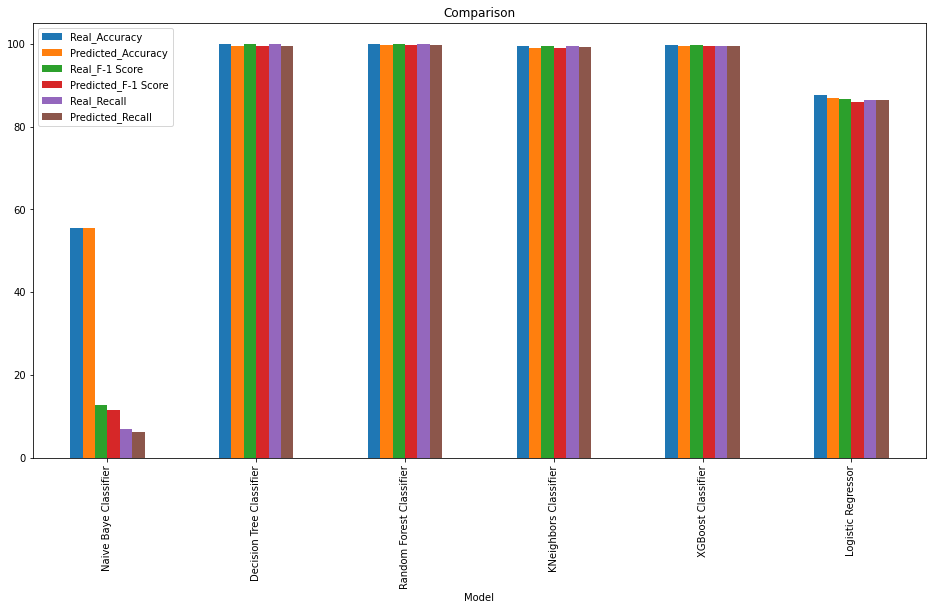

In [ ]:
analysisdf.plot.bar(x='Model',  figsize=(16,8))
plt.title("Comparison")

In [ ]:
import pickle
filename = 'Model.sav'
pickle.dump(rfc, open(filename,'wb'))
model_loaded = pickle.load(open(filename, 'rb'))
result = round(model_loaded.score(x_test, y_test), 4)
print("Accuracy of model created: {}%".format(result*100))

Accuracy of model created: 99.7%


### Validating using confusion matrix


In [ ]:
test = model_loaded.predict(x_test)

In [ ]:
#Counting the Values of true and false
(y_test == test).value_counts()

True     7535
False      23
Name: class, dtype: int64

In [ ]:
pd.crosstab(y_test, test, rownames=['True'], colnames=['Predicted'], margins=True).iloc[:2,:2] 

Predicted,0,1
True,,
0,4052,8
1,15,3483
